In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import torch
import pickle
from numpy import linalg

# Import Dataset

In [3]:
with open('BSBT_df.pkl', 'rb') as f:
    BSBT_df = pickle.load(f)

with open('MyFinalDic.pkl', 'rb') as f:
    final_dic = pickle.load(f)

In [4]:
# Step 1: Extract ATECO and COD_STAT from Final_dic
ateco_list = final_dic.get('ATECO', [])
cod_stat_list = final_dic.get('COD STAT', [])

# Step 2: Filter keys that start with "BSBT"
filtered_dic = {k: v for k, v in final_dic.items() if k.startswith('BSBT')}
print(len(filtered_dic))
# Step 3: Create a list of column names and their corresponding values (lists)
column_names = []
data = {}

for key in filtered_dic:
    # Extract the number after BSBT (e.g., for BSBT1 -> 1)
    index = int(key.replace('BSBT', '')) - 1  # Subtract 1 because lists are zero-indexed

    # Get the corresponding values from ATECO and COD_STAT
    ateco_value = ateco_list[index] if index < len(ateco_list) else 'NA'
    cod_stat_value = cod_stat_list[index] if index < len(cod_stat_list) else 'NA'

    # Create the new column name in the format {index+1}_{ATECO_value}_{COD_STAT_value}
    column_name = f"{index+1}_{ateco_value}_{cod_stat_value}"

    # Add the column name and the corresponding list of values to the dictionary
    column_names.append(column_name)
    data[column_name] = filtered_dic[key]  # Assuming each value is a list

# Step 4: Create the DataFrame with the column names as headers and lists as columns
BSBT_df = pd.DataFrame(data)

925


In [3]:
print(BSBT_df)

       BSBT8  BSBT23  BSBT37  BSBT38  BSBT39  BSBT42  BSBT46  BSBT56  BSBT60  \
0      8.110   17.32   44.72   47.52  43.075  16.050   38.48  20.525   8.020   
1      8.170   19.01   47.84   48.22  30.125  16.500   38.68  18.350   7.980   
2      8.110   17.25   45.68   48.10  18.350  17.050   38.42  18.850   8.100   
3      8.180   17.32   46.44   48.12  15.900  19.250   39.84  18.850   8.000   
4      8.190   17.30   44.56   47.96  12.850  16.175   41.32  18.425   8.140   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8755  17.861   10.78   43.84   25.14  42.125  28.400   45.46  33.762   5.149   
8756  18.614   11.68   48.60   18.22  40.975  16.300   44.18  33.398   5.463   
8757  18.997   10.30   45.44   18.26  47.075  17.400   44.54  33.216   5.626   
8758  16.553   10.71   42.20   18.40  49.425  16.150   40.56  36.282   5.735   
8759  10.355   10.09   43.28   17.62  50.325  17.150   37.90  33.548   5.695   

      BSBT61  ...  BSBT1466  BSBT1539  

# SVD

In [4]:
u,s,v=np.linalg.svd(BSBT_df)

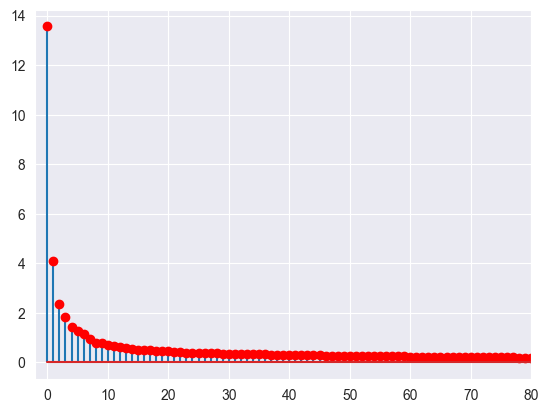

In [5]:
plt.stem(100*s/np.sum(s), markerfmt='ro')
plt.xlim(-2, 80)
plt.show()

In [6]:
print(s)

[7.57167899e+04 2.25225130e+04 1.31231499e+04 1.03240494e+04
 8.15806130e+03 6.99333771e+03 6.53016988e+03 5.23736625e+03
 4.83874574e+03 4.37572673e+03 3.98793205e+03 3.76007368e+03
 3.47222688e+03 3.17029889e+03 3.05223898e+03 2.90869763e+03
 2.82350962e+03 2.72416210e+03 2.67979101e+03 2.61360323e+03
 2.55860150e+03 2.42962031e+03 2.38964623e+03 2.25291544e+03
 2.20876832e+03 2.17392822e+03 2.15755410e+03 2.10512656e+03
 2.07414166e+03 2.02646303e+03 1.96346785e+03 1.93946743e+03
 1.90758520e+03 1.88669880e+03 1.86186272e+03 1.82549004e+03
 1.80764230e+03 1.76564525e+03 1.75559566e+03 1.68679256e+03
 1.68167790e+03 1.66804324e+03 1.65194306e+03 1.61935487e+03
 1.59246345e+03 1.58536921e+03 1.56654014e+03 1.54701568e+03
 1.53603255e+03 1.51336249e+03 1.50608005e+03 1.48167515e+03
 1.46802952e+03 1.43861007e+03 1.42475892e+03 1.39731987e+03
 1.36946484e+03 1.36089836e+03 1.35648454e+03 1.34390213e+03
 1.32423648e+03 1.31096774e+03 1.30404337e+03 1.28204110e+03
 1.27609307e+03 1.253110

# Scaling the data

In [5]:
from sklearn.preprocessing import StandardScaler

load_array = np.array(BSBT_df)
scaler = StandardScaler()
load_array_standardized = scaler.fit_transform(load_array)

# Dimension Reductions with LLE and clustering approaches

# LLE

In [7]:
n_components=3
n_neighbors=4

from sklearn.manifold import LocallyLinearEmbedding

# Perform LLE on the standardized data
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, random_state=42)
reduced_dimensions = lle.fit_transform(load_array_standardized)

## 3D Visualization

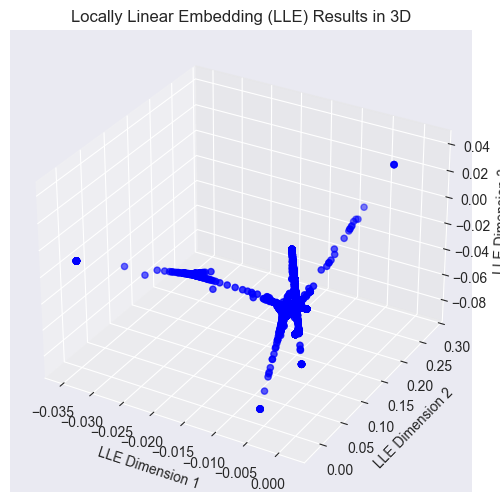

In [8]:
if n_components >= 3:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_dimensions[:, 0], reduced_dimensions[:, 1], reduced_dimensions[:, 2], c='blue', marker='o')
    ax.set_xlabel('LLE Dimension 1')
    ax.set_ylabel('LLE Dimension 2')
    ax.set_zlabel('LLE Dimension 3')
    ax.set_title('Locally Linear Embedding (LLE) Results in 3D')
    plt.show()

# K_means

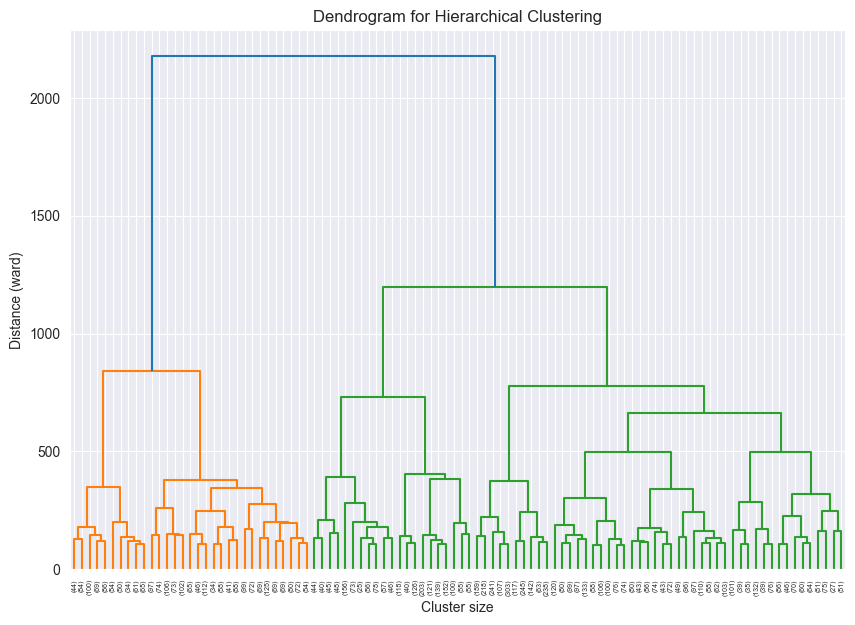

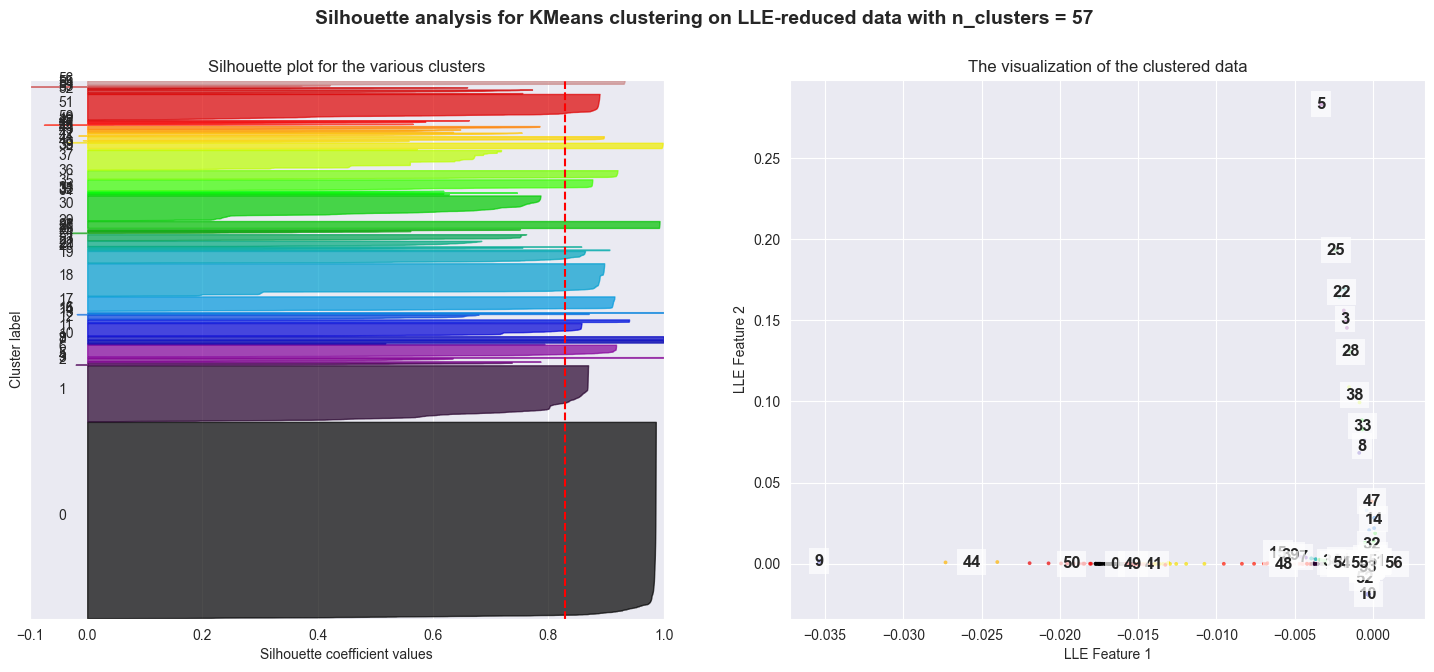

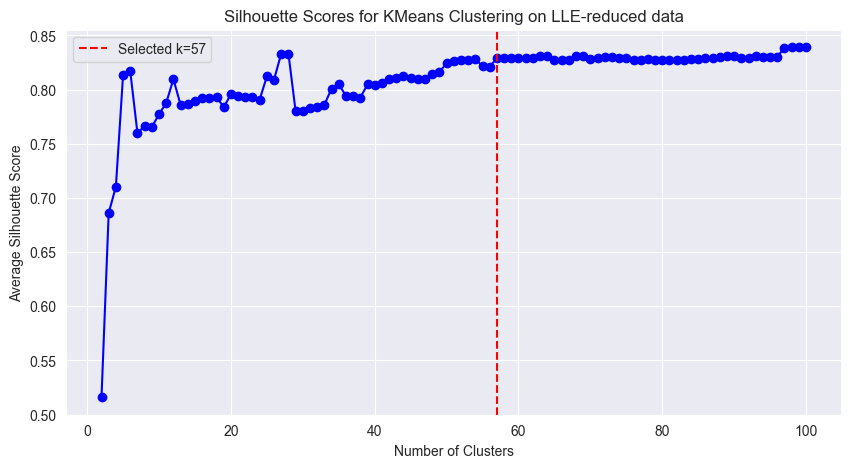

In [12]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.manifold import LocallyLinearEmbedding
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

selected_k_LLE = 57

def plot_LLE_and_silhouette(X, n_neighbors, n_components, max_k, selected_k):

    # Step 1: Apply LLE (dimensionality reduction)
    lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, random_state=42)
    X_lle = lle.fit_transform(X)  # LLE applied, returning transformed data

    # Step 2: Perform clustering (use Agglomerative or KMeans)
    kmeans = KMeans(n_clusters=selected_k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_lle)  # Cluster labels based on reduced data

    # Step 3: Calculate silhouette scores
    silhouette_avg = silhouette_score(X_lle, cluster_labels)
    sample_silhouette_values = silhouette_samples(X_lle, cluster_labels)

    # Step 4: Create silhouette plot
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (selected_k + 1) * 10])

    y_lower = 10
    for i in range(selected_k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / selected_k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for the various clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / selected_k)
    scatter = ax2.scatter(X_lle[:, 0], X_lle[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Add cluster numbers to the plot
    for i in range(selected_k):
        cluster_points = X_lle[cluster_labels == i]
        centroid = np.mean(cluster_points, axis=0)
        ax2.text(centroid[0], centroid[1], str(i), fontweight='bold', fontsize=12,
                 ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("LLE Feature 1")
    ax2.set_ylabel("LLE Feature 2")

    plt.suptitle(f"Silhouette analysis for KMeans clustering on LLE-reduced data with n_clusters = {selected_k}",
                 fontsize=14, fontweight='bold')

    plt.show()

    # Step 6: Plot silhouette scores for different k
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(X_lle)
        silhouette_avg = silhouette_score(X_lle, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', color='b')
    plt.axvline(x=selected_k, color='r', linestyle='--', label=f'Selected k={selected_k}')
    plt.title('Silhouette Scores for KMeans Clustering on LLE-reduced data')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Average Silhouette Score')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming load_array_standardized is the dataset
plot_LLE_and_silhouette(load_array_standardized, n_neighbors, n_components, max_k, selected_k_LLE)


# Hierarchical cluster and dendrograms

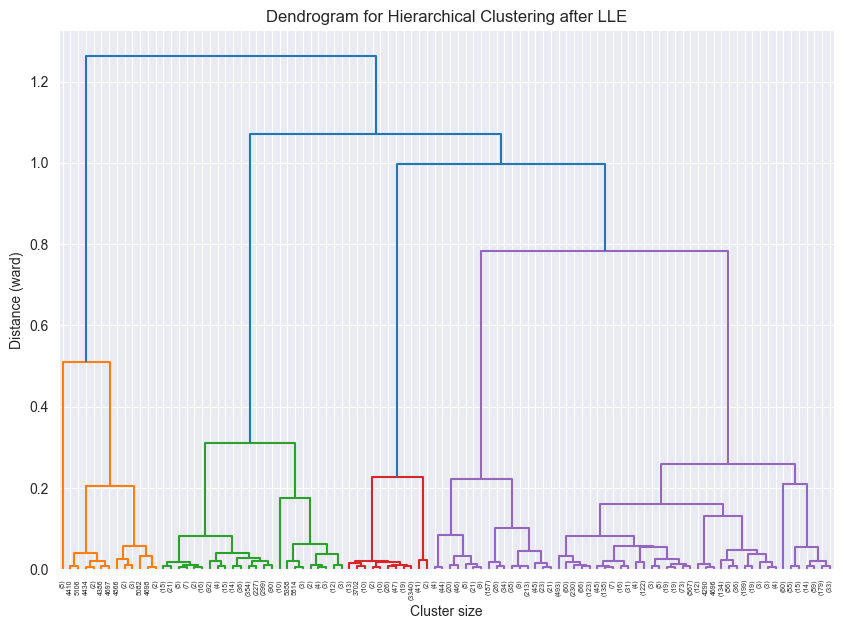

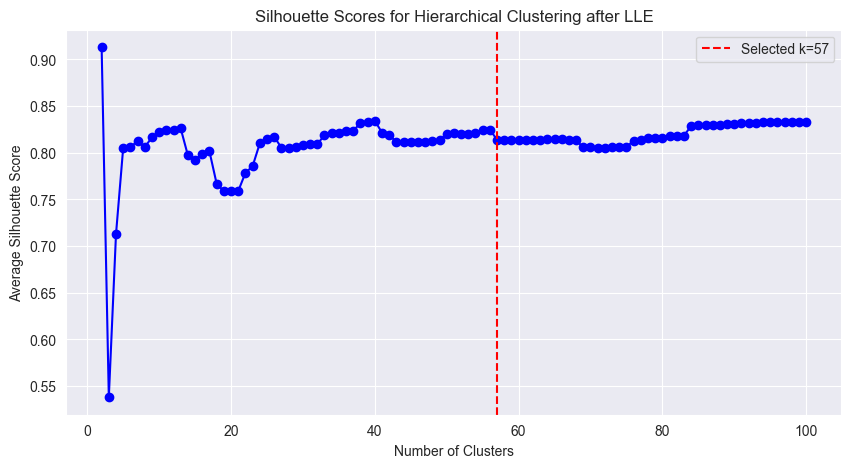

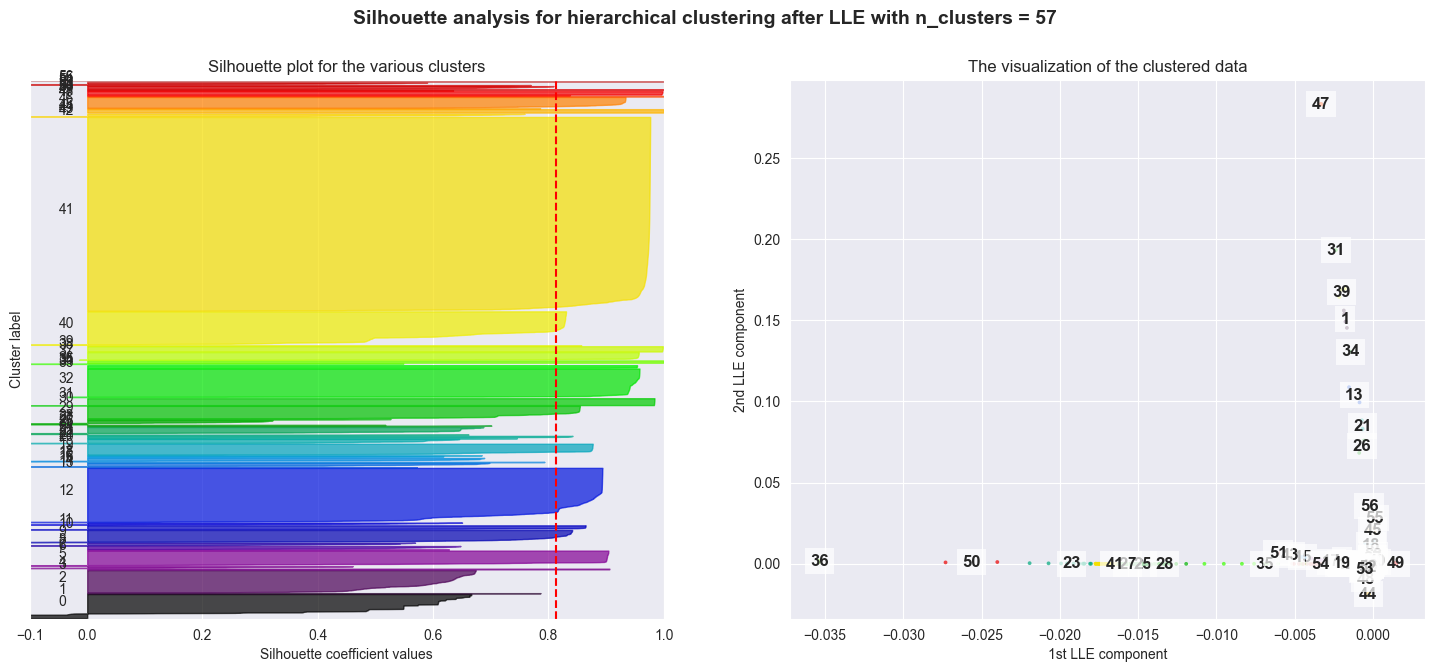

In [14]:

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
import seaborn as sns

n_neighbors=4
n_components=3
max_k=100
selected_k=40

def lle_hierarchical_clustering(X, n_neighbors, n_components, max_k, selected_k):
    # Perform LLE
    lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, random_state=42)
    X_lle = lle.fit_transform(X)

    # Perform hierarchical clustering
    linked = linkage(X_lle, method='ward')

    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linked, truncate_mode='lastp', p=max_k)
    plt.title('Dendrogram for Hierarchical Clustering after LLE')
    plt.xlabel('Cluster size')
    plt.ylabel('Distance (ward)')
    plt.show()

    # Calculate silhouette scores for different k
    silhouette_scores = []
    for k in range(2, max_k + 1):
        hierarchical = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
        cluster_labels = hierarchical.fit_predict(X_lle)
        silhouette_avg = silhouette_score(X_lle, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plot silhouette scores
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', color='b')
    plt.axvline(x=selected_k, color='r', linestyle='--', label=f'Selected k={selected_k}')
    plt.title('Silhouette Scores for Hierarchical Clustering after LLE')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Average Silhouette Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Perform clustering with the selected number of clusters
    hierarchical = AgglomerativeClustering(n_clusters=selected_k, metric='euclidean', linkage='ward')
    cluster_labels = hierarchical.fit_predict(X_lle)

    # Calculate silhouette scores
    silhouette_avg = silhouette_score(X_lle, cluster_labels)
    sample_silhouette_values = silhouette_samples(X_lle, cluster_labels)

    # Create silhouette plot
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_lle) + (selected_k + 1) * 10])

    y_lower = 10
    for i in range(selected_k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / selected_k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for the various clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / selected_k)
    scatter = ax2.scatter(X_lle[:, 0], X_lle[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Add cluster numbers to the plot
    for i in range(selected_k):
        cluster_points = X_lle[cluster_labels == i]
        centroid = np.mean(cluster_points, axis=0)
        ax2.text(centroid[0], centroid[1], str(i), fontweight='bold', fontsize=12,
                 ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("1st LLE component")
    ax2.set_ylabel("2nd LLE component")

    plt.suptitle(f"Silhouette analysis for hierarchical clustering after LLE with n_clusters = {selected_k}",
                 fontsize=14, fontweight='bold')

    plt.show()

# Use the function with your data
lle_hierarchical_clustering(load_array_standardized, n_neighbors, n_components, max_k, selected_k)

## Using MSE for evaluation

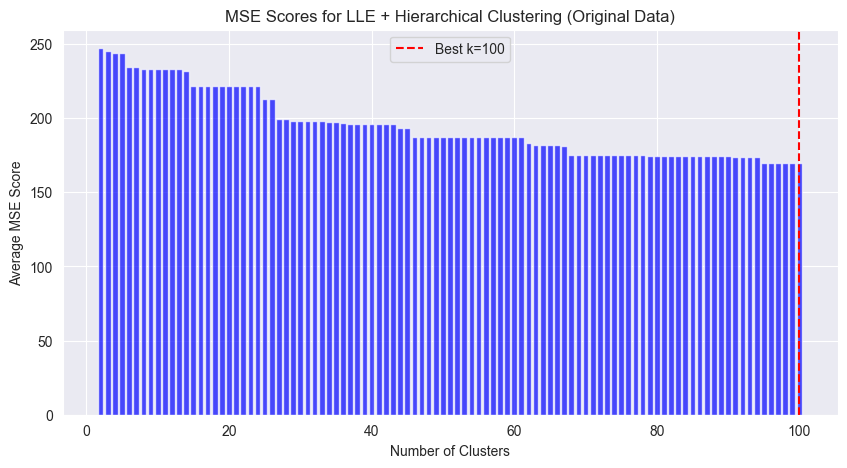

Best number of clusters (k) with least MSE: 100
Reference series for k=91 (original scale) saved.


In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
load_array_standardized = scaler.fit_transform(load_array)

# Function to calculate MSE after applying LLE and clustering on standardized data,
# but calculating MSE on original (inverse-transformed) data
def calculate_mse_with_lle(X_standardized, X_original, max_k, selected_k=None, n_neighbors=10, n_components=2):
    # Apply Locally Linear Embedding (LLE) to the standardized data
    lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components)
    X_lle = lle.fit_transform(X_standardized)

    mse_scores = []
    best_k = None
    min_mse = float('inf')

    for k in range(2, max_k + 1):
        # Perform Agglomerative Clustering on the LLE-transformed data
        hierarchical = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
        cluster_labels = hierarchical.fit_predict(X_lle)

        mse_cluster_total = 0

        # Calculate MSE for each cluster using the inverse-transformed (original) data
        for cluster_id in np.unique(cluster_labels):
            # Get original points for this cluster
            cluster_points_original = X_original[cluster_labels == cluster_id]
            # Compute the average (centroid) of these points in the original scale
            reference_time_series = np.mean(cluster_points_original, axis=0)

            # Calculate MSE of all points in the cluster with respect to the reference time series
            for point in cluster_points_original:
                mse_cluster_total += mean_squared_error(point, reference_time_series)

        # Calculate the average MSE for this k
        average_mse = mse_cluster_total / len(X_original)
        mse_scores.append(average_mse)

        # Keep track of the best k with the lowest MSE
        if average_mse < min_mse:
            min_mse = average_mse
            best_k = k

    # Plot MSE for different k values
    plt.figure(figsize=(10, 5))
    plt.bar(range(2, max_k + 1), mse_scores, color='b', alpha=0.7)
    plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k={best_k}')
    plt.title('MSE Scores for LLE + Hierarchical Clustering (Original Data)')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Average MSE Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Best number of clusters (k) with least MSE: {best_k}")

    # Optionally save reference series for the selected k
    if selected_k is not None:
        save_reference_series_lle(X_standardized, X_original, selected_k, n_neighbors, n_components)

    return best_k

# Function to save the reference series for the selected k after LLE (in original scale)
def save_reference_series_lle(X_standardized, X_original, selected_k, n_neighbors=10, n_components=2):
    # Apply LLE
    lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components)
    X_lle = lle.fit_transform(X_standardized)

    # Perform clustering with the selected k
    hierarchical = AgglomerativeClustering(n_clusters=selected_k, metric='euclidean', linkage='ward')
    cluster_labels = hierarchical.fit_predict(X_lle)

    reference_series_dict = {}

    # Save the reference (average) time series for each cluster
    for cluster_id in np.unique(cluster_labels):
        # Get original points for this cluster
        cluster_points_original = X_original[cluster_labels == cluster_id]
        reference_time_series = np.mean(cluster_points_original, axis=0)  # Average of cluster in original scale
        reference_series_dict[cluster_id] = reference_time_series

    # Save the reference series to a file or return as needed
    np.save(f'reference_series_lle_k_{selected_k}_original.npy', reference_series_dict)
    print(f"Reference series for k={selected_k} (original scale) saved.")

best_k = calculate_mse_with_lle(load_array_standardized, scaler.inverse_transform(load_array_standardized), max_k, selected_k_Hierarchical)


# Gaussian Mixture Model(GMM)

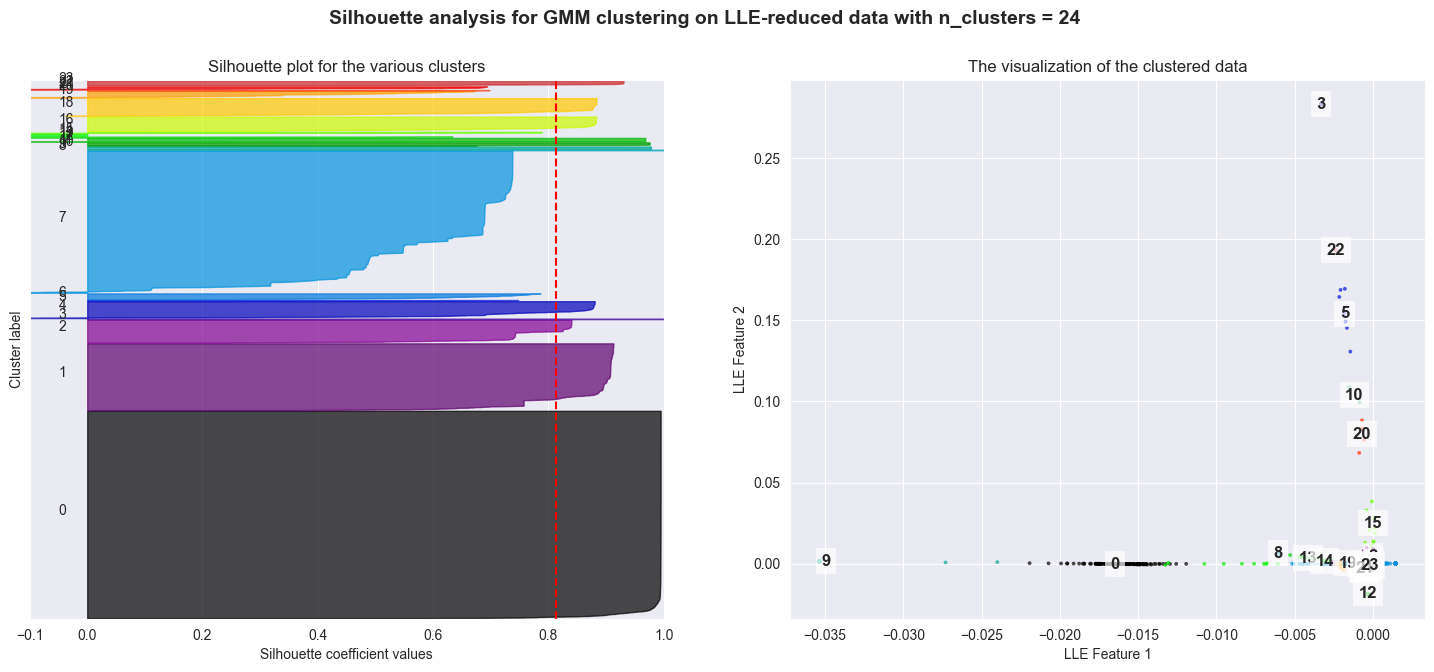

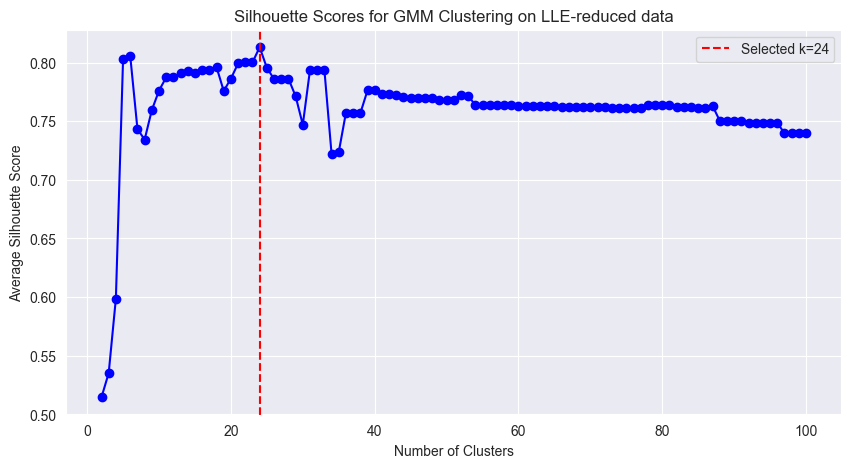

In [16]:
from sklearn.mixture import GaussianMixture

n_neighbors=4
n_components=3
max_k=100
selected_k_LLE=24

def plot_LLE_and_silhouette(X, n_neighbors, n_components, max_k, selected_k):
    # Step 1: Check for NaN or infinite values in the data
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        raise ValueError("The input data contains NaN or infinite values. Please clean the data and try again.")


    # Step 2: Apply LLE (dimensionality reduction)
    lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, random_state=42)
    X_lle = lle.fit_transform(X)  # LLE applied, returning transformed data

    # Step 3: Perform clustering with GMM
    gmm = GaussianMixture(n_components=selected_k, random_state=42)
    cluster_labels = gmm.fit_predict(X_lle)  # Cluster labels based on GMM on reduced data

    # Step 4: Calculate silhouette scores
    silhouette_avg = silhouette_score(X_lle, cluster_labels)
    sample_silhouette_values = silhouette_samples(X_lle, cluster_labels)

    # Step 5: Create silhouette plot
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (selected_k + 1) * 10])

    y_lower = 10
    for i in range(selected_k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # If a cluster has no points, skip it
        if ith_cluster_silhouette_values.shape[0] == 0:
            continue

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / selected_k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for the various clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / selected_k)
    scatter = ax2.scatter(X_lle[:, 0], X_lle[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Add cluster numbers to the plot, skip empty clusters
    for i in range(selected_k):
        cluster_points = X_lle[cluster_labels == i]
        if len(cluster_points) == 0:
            continue  # Skip empty clusters
        centroid = np.mean(cluster_points, axis=0)
        ax2.text(centroid[0], centroid[1], str(i), fontweight='bold', fontsize=12,
                 ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("LLE Feature 1")
    ax2.set_ylabel("LLE Feature 2")

    plt.suptitle(f"Silhouette analysis for GMM clustering on LLE-reduced data with n_clusters = {selected_k}",
                 fontsize=14, fontweight='bold')

    plt.show()

    # Step 6: Plot silhouette scores for different k
    silhouette_scores = []
    for k in range(2, max_k + 1):
        gmm = GaussianMixture(n_components=k, random_state=42)
        cluster_labels = gmm.fit_predict(X_lle)
        silhouette_avg = silhouette_score(X_lle, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', color='b')
    plt.axvline(x=selected_k, color='r', linestyle='--', label=f'Selected k={selected_k}')
    plt.title('Silhouette Scores for GMM Clustering on LLE-reduced data')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Average Silhouette Score')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming load_array_standardized is the dataset
plot_LLE_and_silhouette(load_array_standardized, n_neighbors, n_components, max_k, selected_k_LLE)
